In [1]:
import rasterio as rio
import os 
import glob
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Map wavelengths to specific bands
def map_wavelength_to_band(wavelengths, num_bands=426):
    min_wavelength, max_wavelength = wavelengths
    return int((min_wavelength - neon_start_wavelength) / (neon_end_wavelength - neon_start_wavelength) * (num_bands - 1)), \
           int((max_wavelength - neon_start_wavelength) / (neon_end_wavelength - neon_start_wavelength) * (num_bands - 1))

In [3]:
rgb_dir = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/RGB'
hsi_dir = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/Hyperspectral'
LiD_dir = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/LiDAR'
annot_dir = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/annotations'
class_gt = gpd.read_file('C:/Users/zhou.m/Documents/2023_Fall/canopy_points/canopy_points.shp')

In [4]:
hsi_file_list = glob.glob(os.path.join(hsi_dir, 'HARV*2018_hyperspectral.tif'))

location_df_list = []

for file_path in sorted(hsi_file_list):
    #print(file_path[-31:-23])
    plot_df = class_gt[class_gt['plotID'] == str(file_path[-31:-23])][['plotID','taxonID', 'geometry']]
    
    if plot_df.empty:
        print(str(file_path[-31:-23]) + ' is empty')
    
    location_df_list.append(plot_df)
    

location_df = pd.concat(location_df_list)
location_df.reset_index(drop=True, inplace=True)

location_df

HARV_024 is empty
HARV_028 is empty
HARV_029 is empty
HARV_030 is empty
HARV_031 is empty
HARV_058 is empty
HARV_059 is empty
HARV_063 is empty


,plotID,taxonID,geometry
0,HARV_001,QURU,POINT (725561.662 4700522.824)
1,HARV_001,PIST,POINT (725559.212 4700526.893)
2,HARV_001,QURU,POINT (725546.628 4700526.385)
3,HARV_001,PIST,POINT (725546.384 4700518.992)
4,HARV_001,QURU,POINT (725554.566 4700520.620)
...,...,...,...
619,HARV_052,TSCA,POINT (731851.124 4713853.175)
620,HARV_052,TSCA,POINT (731848.730 4713840.575)
621,HARV_052,BEAL2,POINT (731854.883 4713845.285)
622,HARV_052,BEAL2,POINT (731860.999 4713848.355)


In [11]:
hsi_location_df = location_df.copy()


# Sample geographic coordinates in EPSG 32618
hsi_location_df['longitude'] = hsi_location_df['geometry'].apply(lambda point: point.x)
hsi_location_df['latitude'] = hsi_location_df['geometry'].apply(lambda point: point.y)

for index, row in hsi_location_df.iterrows():
    path = row['plotID']
    
    # Load the image and associated geographic information
    image_path = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/Hyperspectral/' + str(path) + '_2018_hyperspectral.tif'  # Replace with your image path

    if row['plotID'] == path:
    
        with rio.open(image_path) as src:

            # Convert geographic coordinates to pixel coordinates
            hsi_location_df.at[index, 'pixel_x'] = int((row['longitude'] - src.bounds.left) / src.res[0])  # x coordinate
            hsi_location_df.at[index, 'pixel_y'] = int((src.bounds.top - row['latitude']) / src.res[1])  # y coordinate

            # # Convert to integer since pixel coordinates are whole numbers
            # location_df.at[index, 'pixel_x'] = location_df['pixel_x'].as
            # location_df.at[index, 'pixel_y'] = int(location_df['pixel_y'])

hsi_location_df.to_csv('harv_hsi_location.csv')
    
#Print the DataFrame with image-level coordinates
hsi_location_df

,plotID,taxonID,geometry,longitude,latitude,pixel_x,pixel_y
0,HARV_001,QURU,POINT (725561.662 4700522.824),725561.661669,4.700523e+06,26.0,21.0
1,HARV_001,PIST,POINT (725559.212 4700526.893),725559.212049,4.700527e+06,23.0,17.0
2,HARV_001,QURU,POINT (725546.628 4700526.385),725546.628105,4.700526e+06,11.0,18.0
3,HARV_001,PIST,POINT (725546.384 4700518.992),725546.383820,4.700519e+06,10.0,25.0
4,HARV_001,QURU,POINT (725554.566 4700520.620),725554.566223,4.700521e+06,18.0,23.0
...,...,...,...,...,...,...,...
619,HARV_052,TSCA,POINT (731851.124 4713853.175),731851.123801,4.713853e+06,28.0,3.0
620,HARV_052,TSCA,POINT (731848.730 4713840.575),731848.729836,4.713841e+06,25.0,15.0
621,HARV_052,BEAL2,POINT (731854.883 4713845.285),731854.882995,4.713845e+06,31.0,11.0
622,HARV_052,BEAL2,POINT (731860.999 4713848.355),731860.998920,4.713848e+06,37.0,7.0


In [6]:
hsi_location_df['taxonID'].unique()

array(['QURU', 'PIST', 'ACRU', 'BELE', 'ACSA3', 'QUAL', 'FRAM2', 'QUVE',
       'BEPO', 'TSCA', 'PIRI', 'PIAB', 'BEPA', 'PRSE2', 'ACPE', 'BEAL2',
       'NYSY', 'FAGR'], dtype=object)

In [7]:
hsi_location_df['plotID'].unique()

array(['HARV_001', 'HARV_011', 'HARV_014', 'HARV_015', 'HARV_016',
       'HARV_017', 'HARV_022', 'HARV_025', 'HARV_026', 'HARV_027',
       'HARV_033', 'HARV_035', 'HARV_036', 'HARV_037', 'HARV_038',
       'HARV_039', 'HARV_040', 'HARV_041', 'HARV_042', 'HARV_043',
       'HARV_044', 'HARV_045', 'HARV_046', 'HARV_047', 'HARV_048',
       'HARV_049', 'HARV_050', 'HARV_051', 'HARV_052'], dtype=object)

In [8]:
rgb_location_df = location_df.copy()


# Sample geographic coordinates in EPSG 32618
rgb_location_df['longitude'] = rgb_location_df['geometry'].apply(lambda point: point.x)
rgb_location_df['latitude'] = rgb_location_df['geometry'].apply(lambda point: point.y)


for index, row in rgb_location_df.iterrows():
    path = row['plotID']
    
    # Load the image and associated geographic information
    image_path = 'C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/RGB/' + str(path) + '_2018.tif'  # Replace with your image path

    
    if row['plotID'] == path:
    
        with rio.open(image_path) as src:

            # Convert geographic coordinates to pixel coordinates
            rgb_location_df.at[index, 'pixel_x'] = int((row['longitude'] - src.bounds.left) / src.res[0])  # x coordinate
            rgb_location_df.at[index, 'pixel_y'] = int((src.bounds.top - row['latitude']) / src.res[1])  # y coordinate

            # # Convert to integer since pixel coordinates are whole numbers
            # location_df.at[index, 'pixel_x'] = location_df['pixel_x'].as
            # location_df.at[index, 'pixel_y'] = int(location_df['pixel_y'])

   
    
#Print the DataFrame with image-level coordinates
rgb_location_df

,plotID,taxonID,geometry,longitude,latitude,pixel_x,pixel_y
0,HARV_001,QURU,POINT (725561.662 4700522.824),725561.661669,4.700523e+06,260.0,216.0
1,HARV_001,PIST,POINT (725559.212 4700526.893),725559.212049,4.700527e+06,236.0,176.0
2,HARV_001,QURU,POINT (725546.628 4700526.385),725546.628105,4.700526e+06,110.0,181.0
3,HARV_001,PIST,POINT (725546.384 4700518.992),725546.383820,4.700519e+06,107.0,255.0
4,HARV_001,QURU,POINT (725554.566 4700520.620),725554.566223,4.700521e+06,189.0,238.0
...,...,...,...,...,...,...,...
619,HARV_052,TSCA,POINT (731851.124 4713853.175),731851.123801,4.713853e+06,280.0,31.0
620,HARV_052,TSCA,POINT (731848.730 4713840.575),731848.729836,4.713841e+06,256.0,157.0
621,HARV_052,BEAL2,POINT (731854.883 4713845.285),731854.882995,4.713845e+06,317.0,110.0
622,HARV_052,BEAL2,POINT (731860.999 4713848.355),731860.998920,4.713848e+06,378.0,79.0


(3, 400, 400)


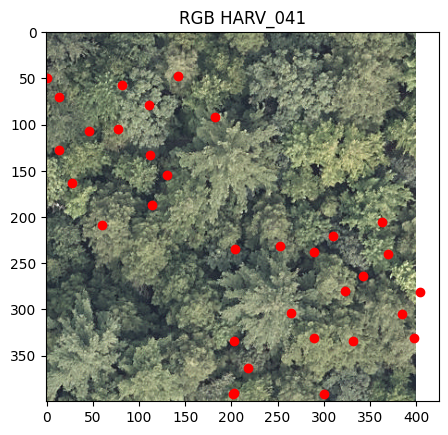

In [9]:
rgb_x_coords = rgb_location_df[rgb_location_df['plotID'] == 'HARV_041']['pixel_x'].values
rgb_y_coords = rgb_location_df[rgb_location_df['plotID'] == 'HARV_041']['pixel_y'].values
hsi_x_coords = hsi_location_df[hsi_location_df['plotID'] == 'HARV_041']['pixel_x'].values
hsi_y_coords = hsi_location_df[hsi_location_df['plotID'] == 'HARV_041']['pixel_y'].values

with rio.open('C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/RGB/HARV_041_2018.tif') as dataset:
    array = dataset.read()
    print(array.shape)
    plt.imshow(np.transpose(array, (1, 2, 0)))
    
    # Coordinates of the red dot (replace with your desired coordinates)
    #red_dot_x = image_pixel_x
    #red_dot_y = image_pixel_y

    # Plot the red dots
    plt.scatter(rgb_x_coords, rgb_y_coords, color='red', marker='o')
    
    plt.title('RGB HARV_041')

    # Show the plot
    plt.show()

(40, 40, 3)


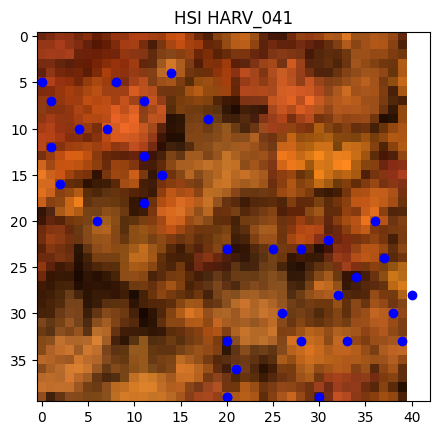

In [10]:
# Approximate wavelength ranges for red, green, and blue
red_wavelengths = (620, 750)
green_wavelengths = (520, 570)
blue_wavelengths = (450, 495)

neon_start_wavelength = 380
neon_end_wavelength = 2510



# Select bands for red, green, and blue
red_bands = map_wavelength_to_band(red_wavelengths)
green_bands = map_wavelength_to_band(green_wavelengths)
blue_bands = map_wavelength_to_band(blue_wavelengths)

#print(red_bands, green_bands, blue_bands)

with rio.open('C:/Users/zhou.m/Documents/2023_Fall/NeonTree/weecology/evaluation/Hyperspectral/HARV_041_2018_hyperspectral.tif') as dataset:
    hyperspectral_data = dataset.read()

   # Create a composite image using selected bands
    composite_image = np.stack([hyperspectral_data[red_bands[0]:red_bands[1] + 1].mean(axis=0),
                            hyperspectral_data[green_bands[0]:green_bands[1] + 1].mean(axis=0),
                            hyperspectral_data[blue_bands[0]:blue_bands[1] + 1].mean(axis=0)], axis=0)


    print(np.transpose(composite_image, (1, 2, 0)).shape)
    
    # Normalize the composite image to [0, 1]
    composite_image = (composite_image - composite_image.min()) / (composite_image.max() - composite_image.min())


    plt.imshow(np.transpose(composite_image, (1, 2, 0)))  # Transpose to (height, width, bands) for display

    # Plot the red dots
    plt.scatter(hsi_x_coords, hsi_y_coords, color='blue', marker='o')

    plt.title('HSI HARV_041')
    
    # Show the plot
    plt.show()